In [1]:
!pip install python-sat[pblib,aiger]

     |████████████████████████████████| 1.8 MB 2.7 MB/s 
     |████████████████████████████████| 3.4 MB 41.9 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-py3-none-any.whl size=42723 sha256=c74eb760ad696a4cd31423f8f24ca71f9ec525bd74ca1dd539cd564a71ac048e
  Stored in directory: /root/.cache/pip/wheels/88/5d/ba/f27d8af07306b65ee44f9d3f9cadea1db749a421a6db8a99bf
Successfully built parsimonious


nxn:  4 population:  4
x = 0, y = 0, rule = B348/S23
6b$b2o3b$b2o3b$6b$6b$6b$!


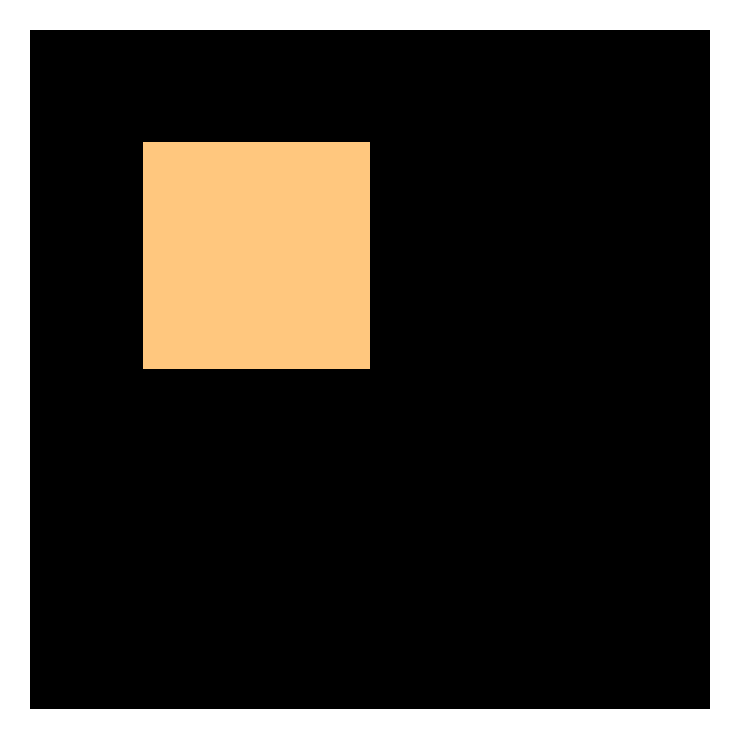

-------------------------DONE-------------------------
nxn:  5 population:  4
x = 0, y = 0, rule = B348/S23
7b$b2o4b$b2o4b$7b$7b$7b$7b$!


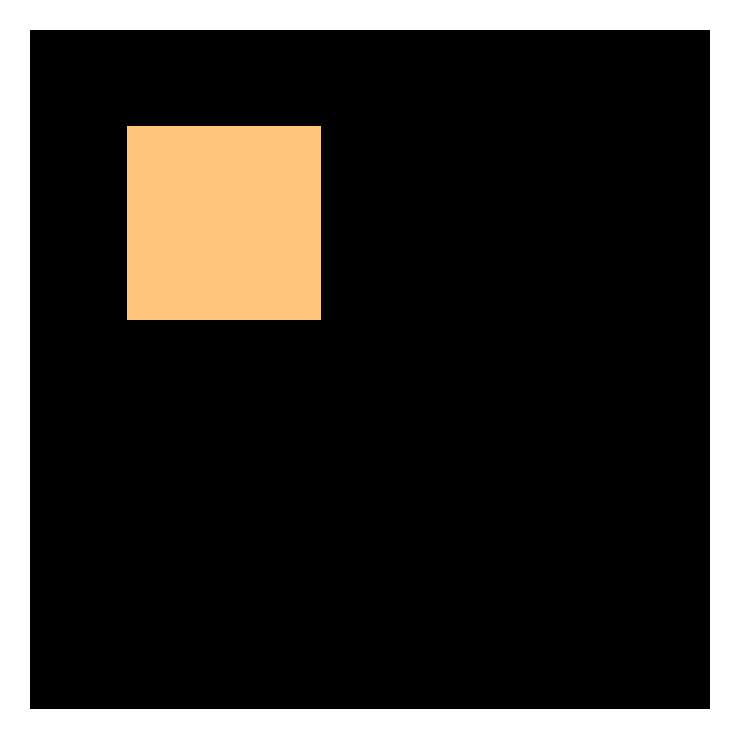

nxn:  5 population:  8
x = 0, y = 0, rule = B348/S23
7b$b2o4b$b2o4b$7b$4b2ob$4b2ob$7b$!


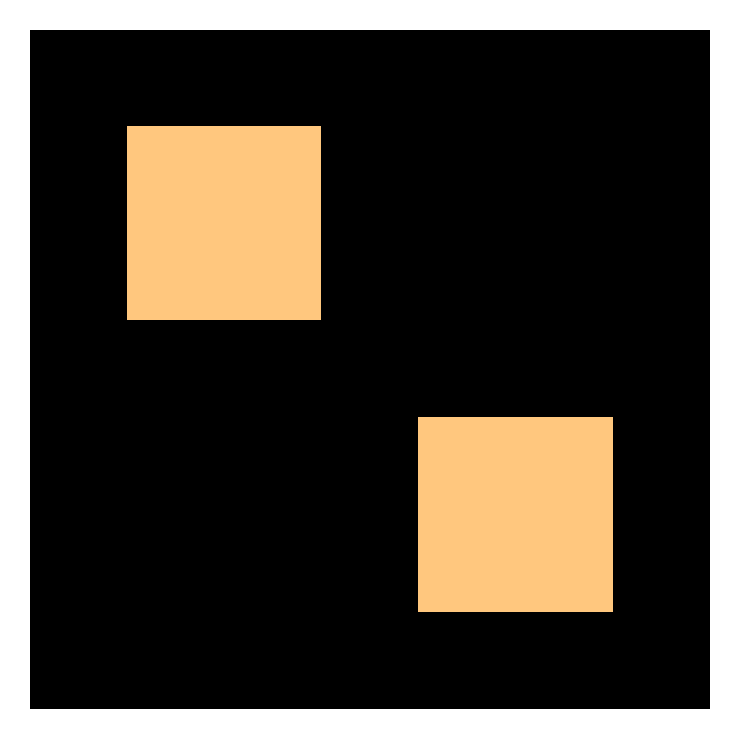

-------------------------DONE-------------------------
nxn:  6 population:  4
x = 0, y = 0, rule = B348/S23
8b$8b$8b$4b2o2b$4b2o2b$8b$8b$8b$!


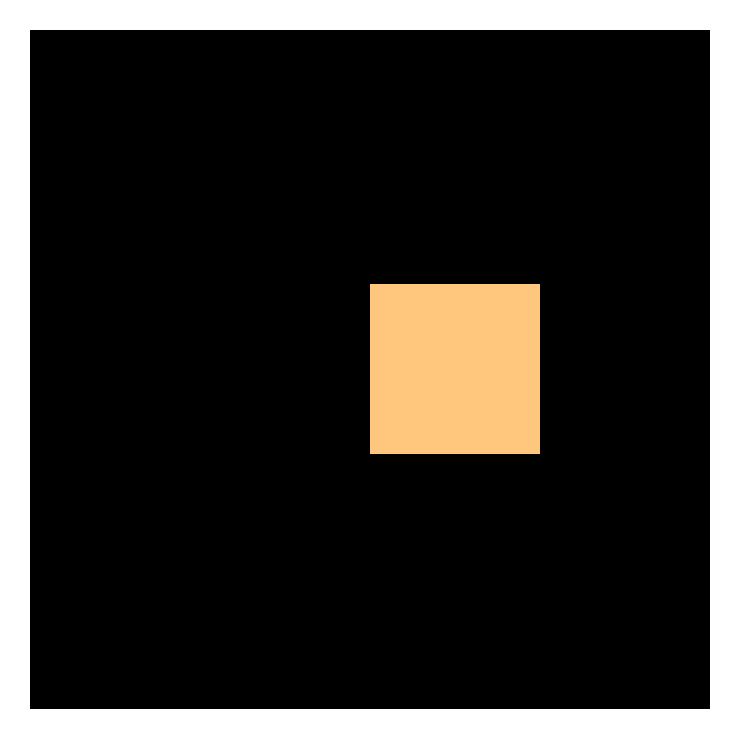

nxn:  6 population:  8
x = 0, y = 0, rule = B348/S23
8b$8b$8b$8b$8b$b2o2b2ob$b2o2b2ob$8b$!


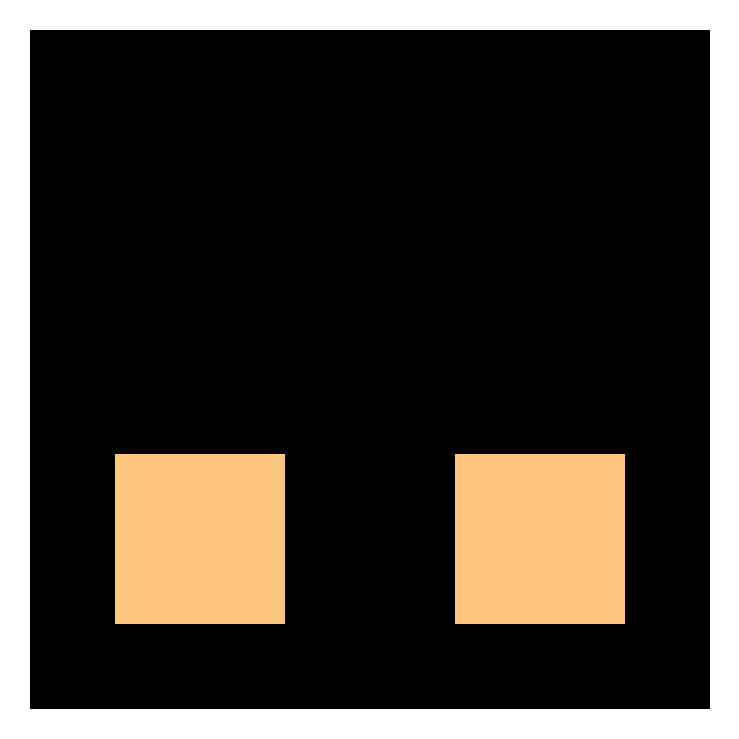

nxn:  6 population:  12
x = 0, y = 0, rule = B348/S23
8b$5b2ob$5b2ob$8b$8b$b2o2b2ob$b2o2b2ob$8b$!


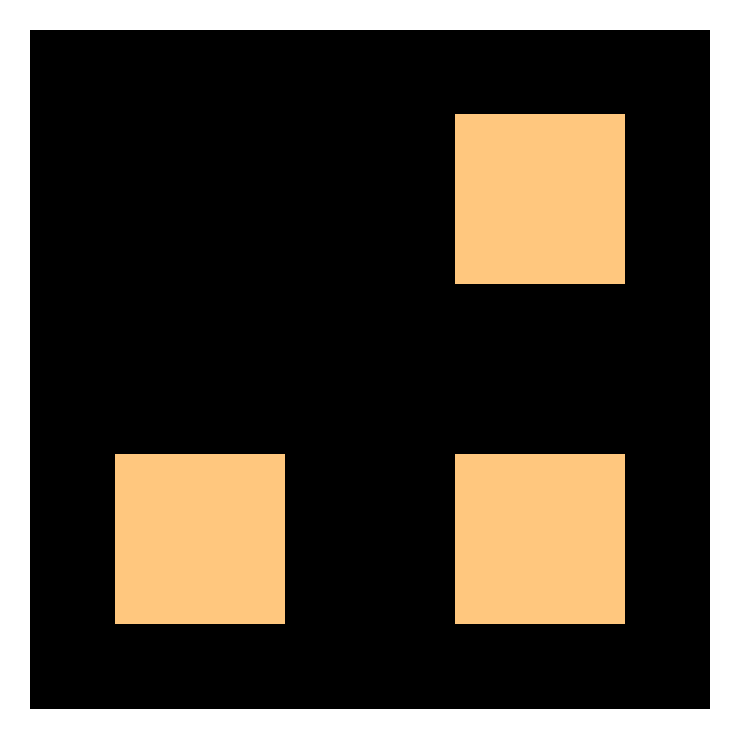

nxn:  6 population:  16
x = 0, y = 0, rule = B348/S23
8b$b2o2b2ob$b2o2b2ob$8b$8b$b2o2b2ob$b2o2b2ob$8b$!


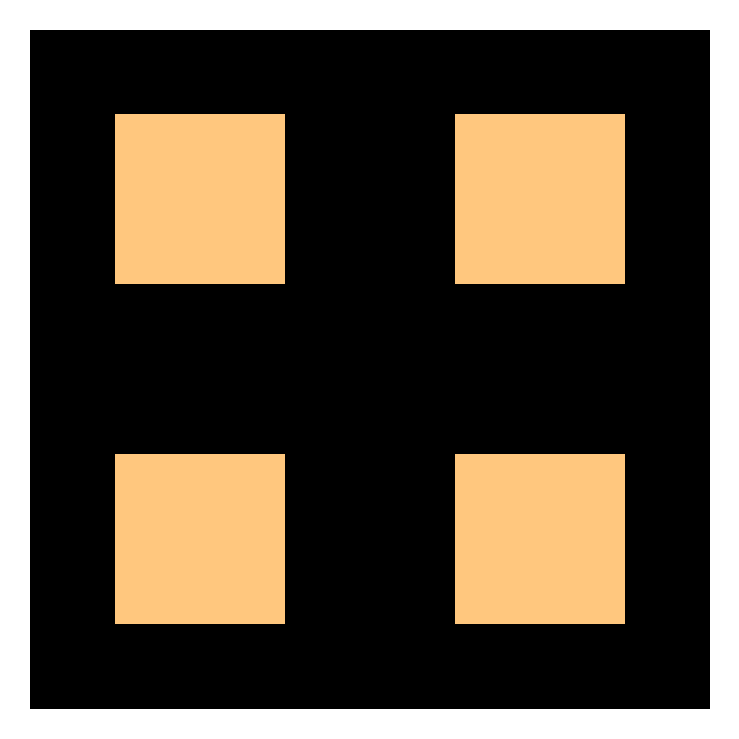

-------------------------DONE-------------------------
nxn:  7 population:  8
x = 0, y = 0, rule = B348/S23
9b$9b$9b$9b$9b$9b$b2o2b2o2b$b2o2b2o2b$9b$!


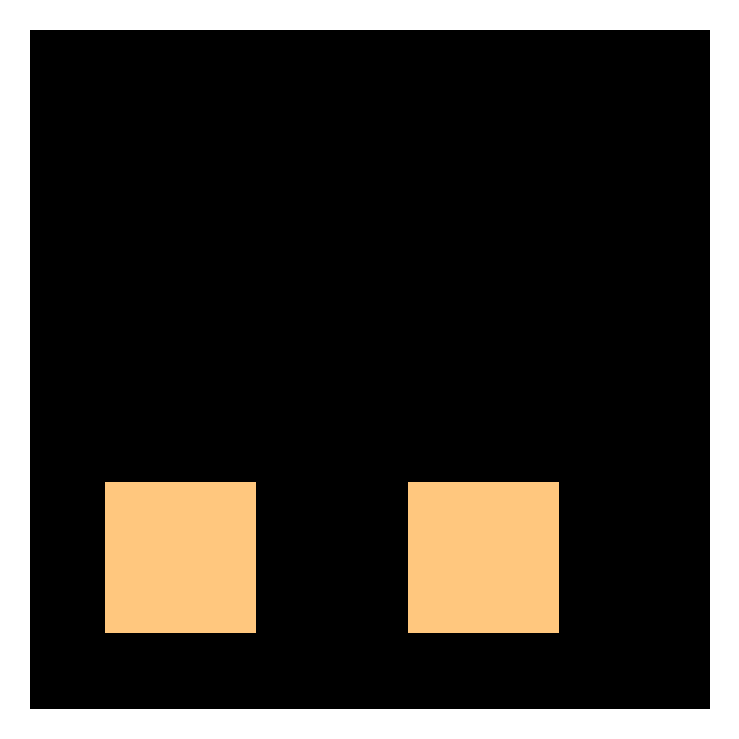

nxn:  7 population:  16
x = 0, y = 0, rule = B348/S23
9b$2b2o5b$2b2o2b2ob$6b2ob$9b$9b$2b2o2b2ob$2b2o2b2ob$9b$!


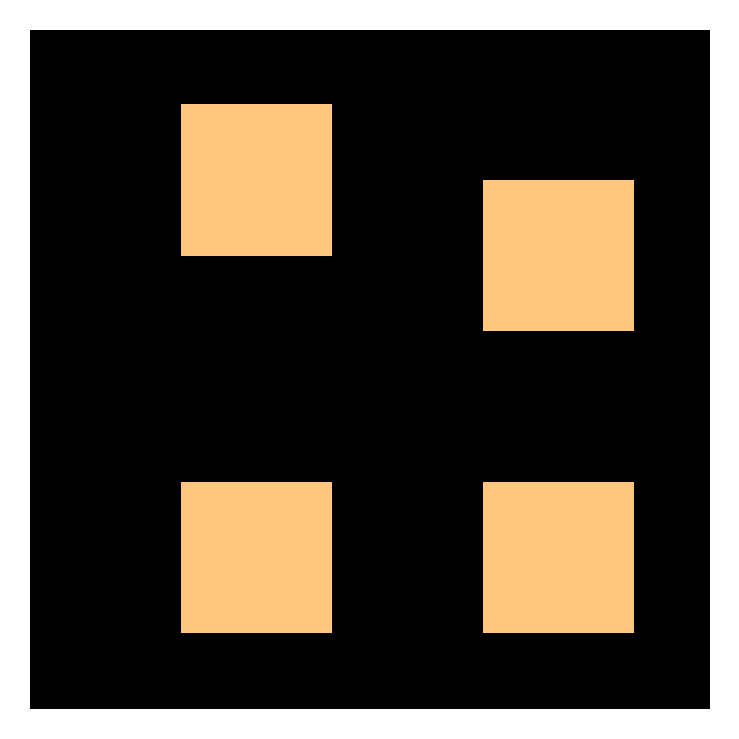

-------------------------DONE-------------------------
nxn:  8 population:  4
x = 0, y = 0, rule = B348/S23
10b$10b$10b$10b$b2o7b$b2o7b$10b$10b$10b$10b$!


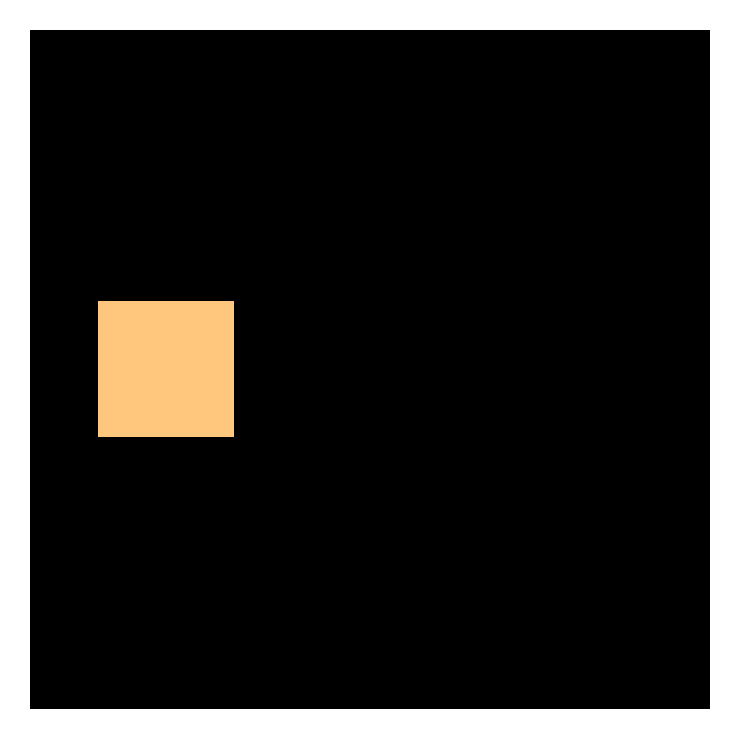

nxn:  8 population:  8
x = 0, y = 0, rule = B348/S23
10b$10b$10b$10b$10b$10b$10b$3b2o2b2ob$3b2o2b2ob$10b$!


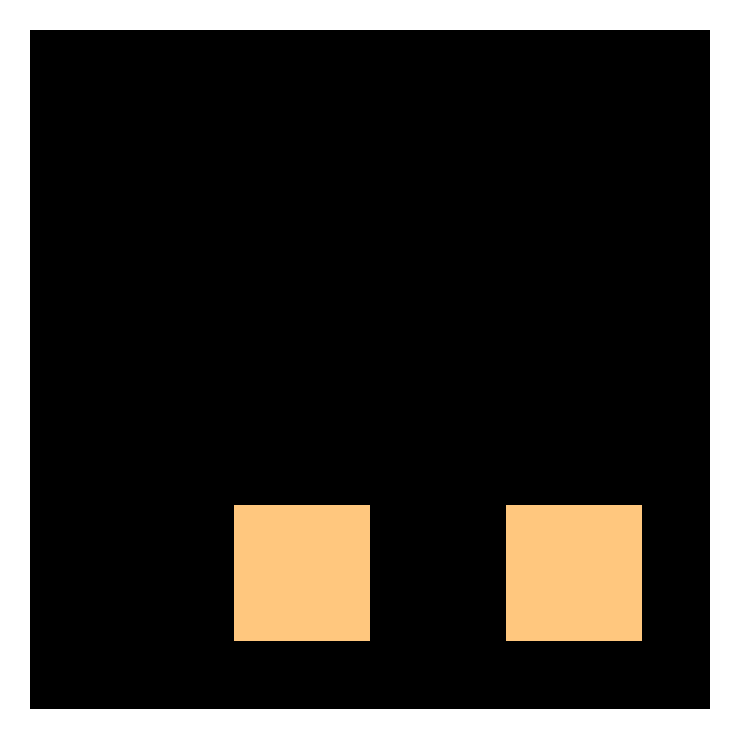

nxn:  8 population:  12
x = 0, y = 0, rule = B348/S23
10b$10b$10b$7b2ob$7b2ob$10b$2b2o6b$2b2o3b2ob$7b2ob$10b$!


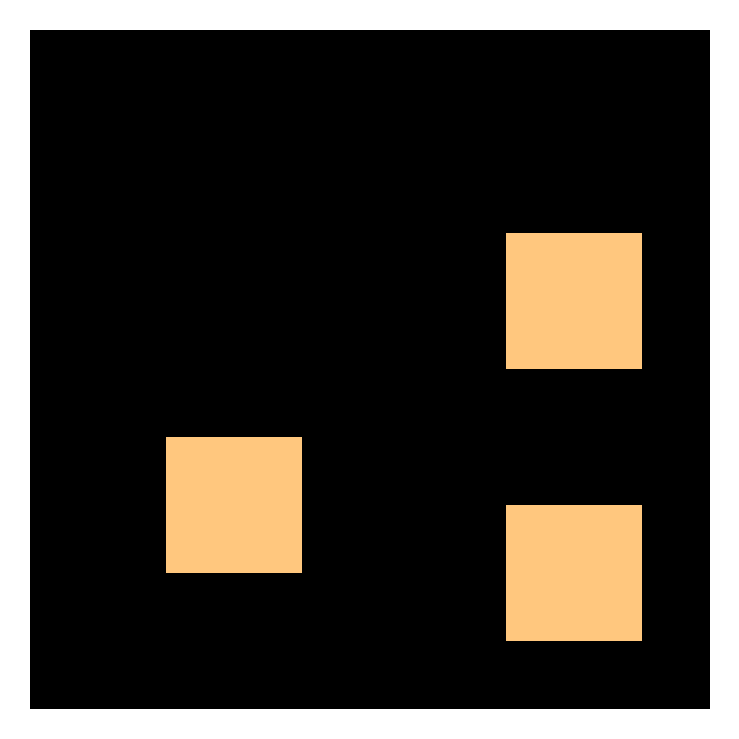

nxn:  8 population:  16
x = 0, y = 0, rule = B348/S23
10b$3b2o5b$3b2o5b$7b2ob$7b2ob$10b$2b2o6b$2b2o3b2ob$7b2ob$10b$!


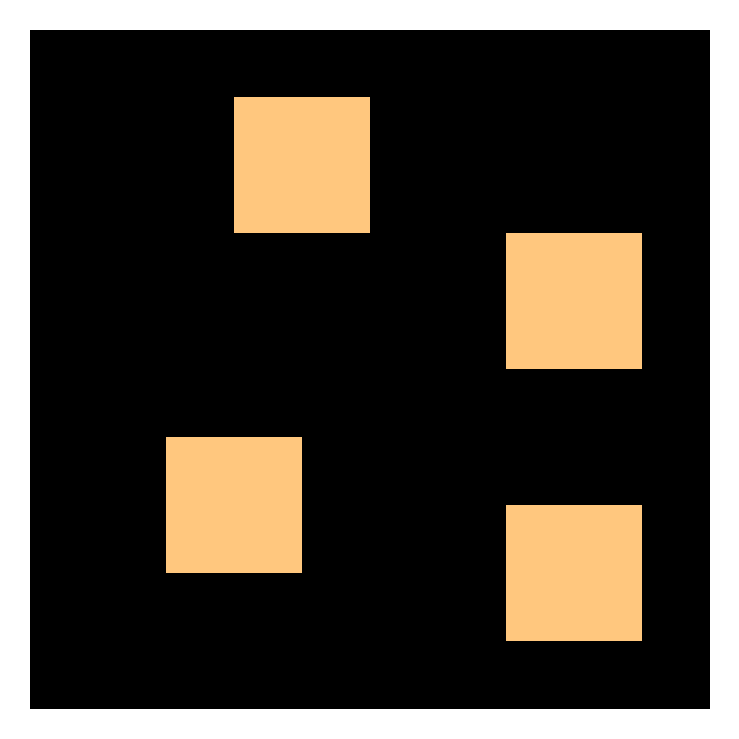

nxn:  8 population:  20
x = 0, y = 0, rule = B348/S23
10b$b2o4b2ob$b2o4b2ob$10b$4b2o4b$4b2o4b$10b$b2o4b2ob$b2o4b2ob$10b$!


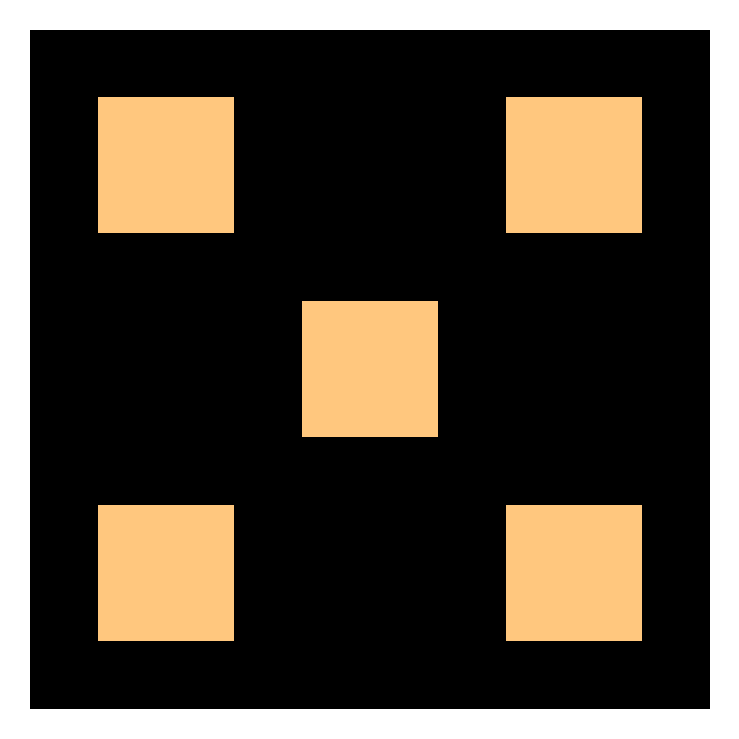

-------------------------DONE-------------------------
nxn:  9 population:  4
x = 0, y = 0, rule = B348/S23
11b$11b$11b$11b$11b$11b$8b2ob$8b2ob$11b$11b$11b$!


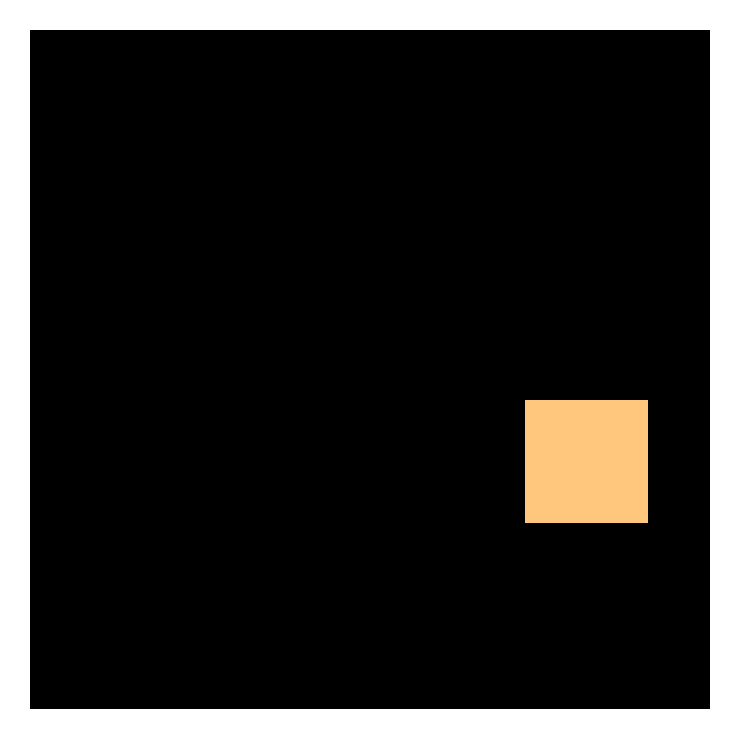

nxn:  9 population:  8
x = 0, y = 0, rule = B348/S23
11b$11b$11b$11b$11b$11b$11b$11b$4b2o2b2ob$4b2o2b2ob$11b$!


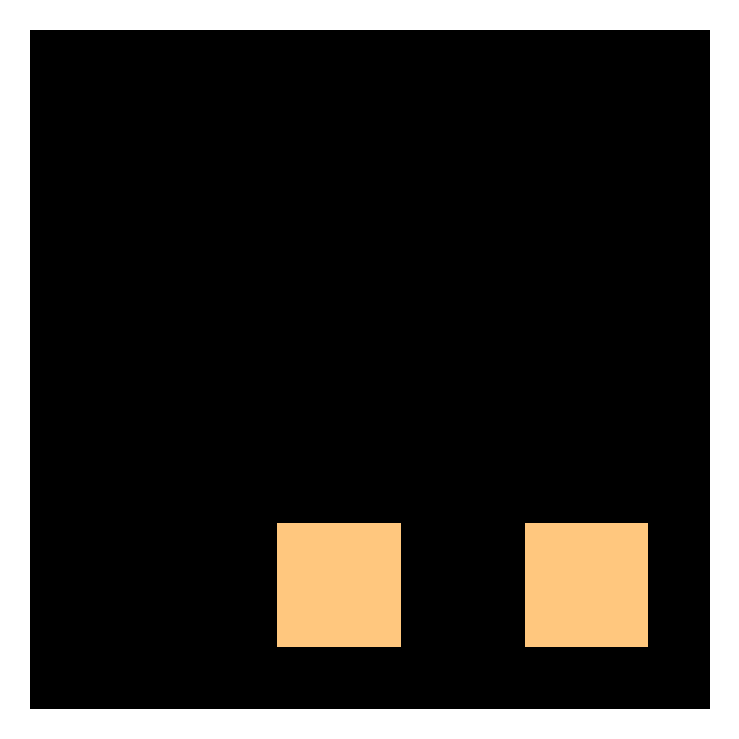

nxn:  9 population:  12
x = 0, y = 0, rule = B348/S23
11b$11b$b2o8b$b2o8b$11b$5b2o4b$5b2o4b$b2o8b$b2o8b$11b$11b$!


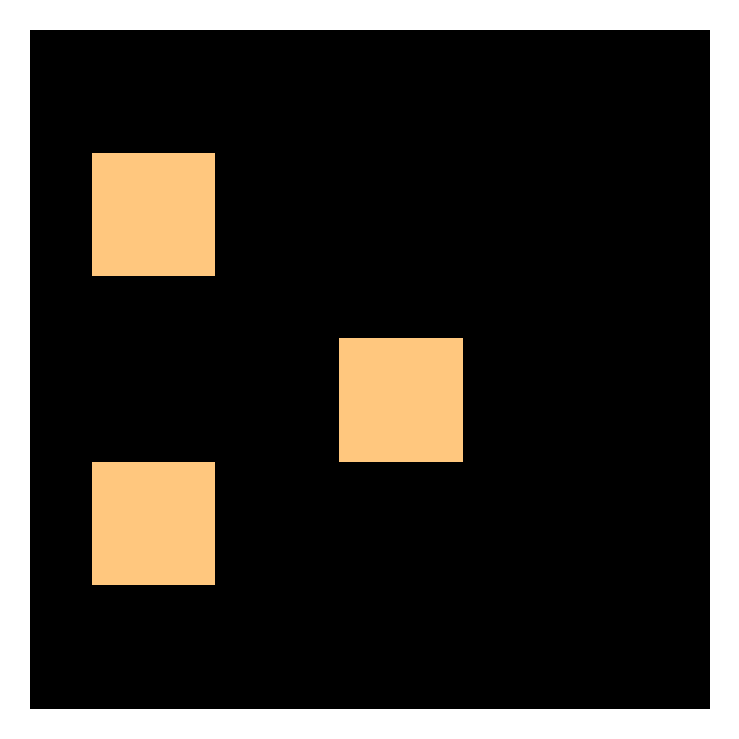

nxn:  9 population:  20
x = 0, y = 0, rule = B348/S23
11b$4b2o5b$4b2o2b2ob$8b2ob$b2o8b$b2o8b$8b2ob$8b2ob$4b2o5b$4b2o5b$11b$!


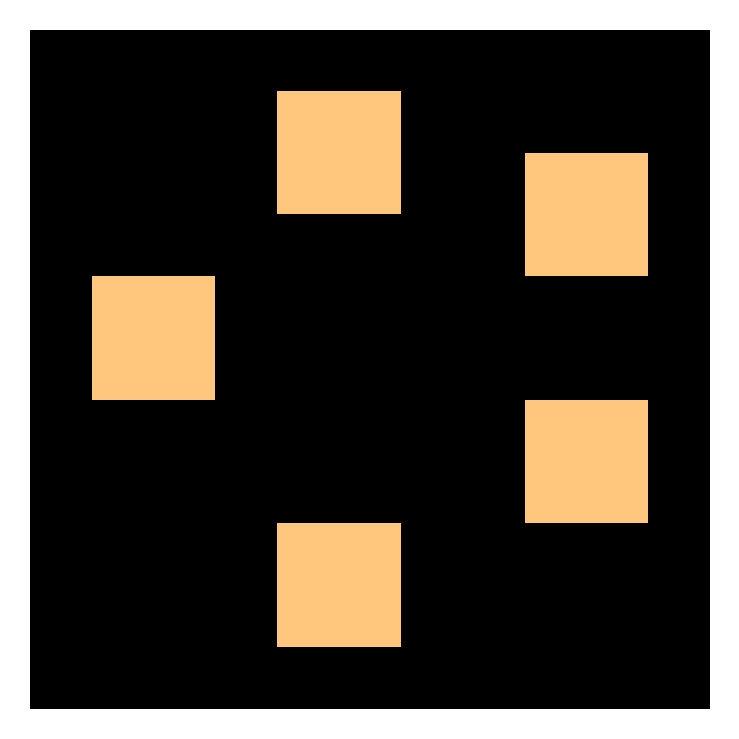

nxn:  9 population:  24
x = 0, y = 0, rule = B348/S23
11b$2b2o4b2ob$2b2o4b2ob$11b$5b2o4b$b2o2b2o4b$b2o8b$11b$4b2o2b2ob$4b2o2b2ob$11b$!


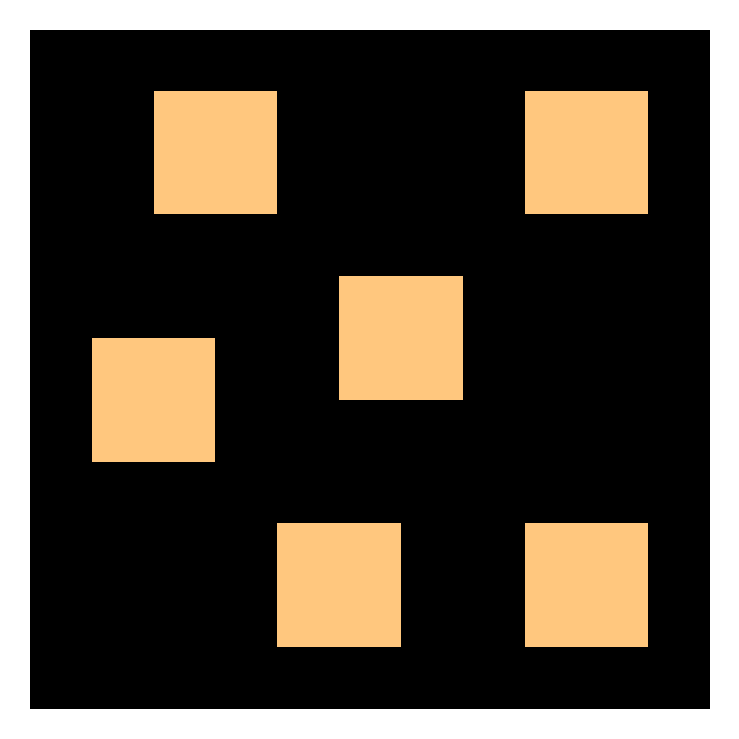

-------------------------DONE-------------------------


KeyboardInterrupt: ignored

In [ ]:
import pysat.solvers
from pysat.card import CardEnc as encode
from random import shuffle
import numpy as np
from math import sqrt
from tqdm import tqdm 
import matplotlib.pyplot as plt

Rule = [[3,4, 8], [2,3]]
rulestr = lambda r: 'B' + ''.join(map(str, r[0])) + '/S' + ''.join(map(str, r[1])) + '\n'

def draw(arr):
    # cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
    #                     'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
    #                     'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    cmap = 'copper'
    size = 3
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(arr, cmap = cmap)
    plt.show()
    plt.close()

def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1
    if not data: return ''
    for char in data:
        if char != prev_char:
            if prev_char:
                encoding = encoding + str(count) + prev_char if count > 1 else encoding + prev_char
            count = 1
            prev_char = char
        else:
            count += 1
    else:
        encoding = encoding + str(count) + prev_char if count > 1 else encoding + prev_char
        return encoding

def clauses_or(A, B, top):
    x = top + 1 
    y = top + 2

    out = [[x,y],]

    for i in A:
        out.append(i + [-x,])

    for i in B:
        out.append(i + [-y,])

    return out

def clauses_not(A, top):
    x = [top + i for i in range(1, len(A)+1)] 
    out = [[-i for i in x],]

    for k, v in enumerate(A):
        out.append(v + [-x[k],])

    return out, max(x) + 1

def m_to_rle(m):
    
    prefix = 'x = 0, y = 0, rule = ' + rulestr(Rule)
    m = [''.join(list(map(str, i)) + ['$',]) for i in m]
    S = ''.join(m)
    S = S.replace('0', 'b')
    S = S.replace('1', 'o')
    return rle_encode(prefix + S + '!')

for nn in range(4, 30):

    nn = nn + 2
    dim = (nn, nn)
    N = dim[0]*dim[1]
    #Rr = ((dim[1]-2)**2)//2 + 2
    Rr = 1

    v = []
    t = 0
    d = dict()

    for i in range(dim[0]):
        for j in range(dim[1]):
            t += 1
            d[(i,j)] = t

            v.append((i,j))

    clauses = []
    topid = dim[0]*dim[1]+1

    for a, b in v:
        g  = d[(a,b)]

        temp = [(a+1,b),(a,b+1),  (a-1,b),(a,b-1),   (a-1,b-1),(a+1,b+1), (a-1,b+1),(a+1,b-1)]
        #temp = [ (a+1,b),(a-1,b), (a,b+1),(a,b-1), ]

        if a == dim[0]-1:
            temp = list(filter(lambda x: x not in ((a+1,b),(a+1,b+1),(a+1,b-1)), temp))

        if b == dim[1]-1:
            temp = list(filter(lambda x: x not in ((a,b+1),(a-1,b+1),(a+1,b+1)), temp))

        if a == 0:
            temp = list(filter(lambda x: x not in ((a-1,b),(a-1,b-1),(a-1,b+1)), temp))

        if b == 0:
            temp = list(filter(lambda x: x not in ((a,b-1),(a+1,b-1),(a-1,b-1)), temp))

            
        tempc = []
        c = [d[k] for k in temp]

        if len(c) > 5:
            tclaus = encode.atleast(lits = c, bound = Rule[1][0], top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)


            tclaus = encode.atmost(lits = c, bound = Rule[1][-1], top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)

        temp1 = []
        temp2 = []

        if len(c) > 3:

            for Item_rule in Rule[0]:
                if len(c) >= Item_rule+1:

                    temp1 = []
                    temp2 = []

                    if Item_rule < 8:
                        tclaus = encode.atleast(lits = c, bound = Item_rule+1, top_id = topid).clauses
                        for i in tclaus:
                            temp1.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp1 for literal in clause), topid)

                        tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                        for i in tclaus:
                            temp2.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

                        for i in clauses_or(temp1, temp2, topid):
                            clauses.append(i)
                    else:
                        tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                        for i in tclaus:
                            clauses.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

        topid += 3

        if len(c) < 8:
            clauses.append([-g, ] )
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)
    
    prArr = []
    prbbound = Rr
    #print('clauses done')

    while 1:

        bbound = prbbound
        clausesTemp = clauses + encode.atleast(lits=[i for i in range(1,dim[0]*dim[1]+1)], top_id = topid, bound = bbound).clauses

        solver = pysat.solvers.Cadical()
        for clause in clausesTemp:
            solver.add_clause(clause)
        sat = solver.solve()


        if sat:
            model = solver.get_model()
            temp = [1 if i> 0 else 0 for i in model[:N]]
            
            print( 'nxn: ', nn-2, 'population: ', sum(temp))
            prbbound = sum(temp)+1

            temp = np.array(temp)
            temp.resize(dim)

            print(m_to_rle(temp.tolist()))
            draw(temp)
        else:
            print('-------------------------DONE-------------------------')
            break

In [ ]:
import pysat.solvers
from pysat.card import CardEnc as encode
from random import shuffle
import numpy as np
from math import sqrt
from tqdm import tqdm 
import matplotlib.pyplot as plt

Rule = [[3,], [2,3]]
rulestr = lambda r: 'B' + ''.join(map(str, r[0])) + '/S' + ''.join(map(str, r[1])) + '\n'

def draw(arr):
    # cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
    #                     'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
    #                     'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    cmap = 'copper'
    size = 3
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(arr, cmap = cmap)
    plt.show()
    plt.close()

def clauses_or(A, B, top):
    x = top + 1 
    y = top + 2

    out = [[x,y],]

    for i in A:
        out.append(i + [-x,])

    for i in B:
        out.append(i + [-y,])

    return out

def clauses_not(A, top):
    x = [top + i for i in range(1, len(A)+1)] 
    out = [[-i for i in x],]

    for k, v in enumerate(A):
        out.append(v + [-x[k],])

    return out, max(x) + 1

def m_to_rle(m):
    
    prefix = 'x = 0, y = 0, rule = ' + rulestr(Rule)
    m = [''.join(list(map(str, i)) + ['$',]) for i in m]
    S = ''.join(m)
    S = S.replace('0', 'b')
    S = S.replace('1', 'o')
    return prefix + S + '!'

for nn in range(21, 30):

    nn = nn + 2
    dim = (nn, nn)
    N = dim[0]*dim[1]
    Rr = 232 #((dim[1]-2)**2)//2 + 2
    
    v = []
    t = 0
    d = dict()

    for i in range(dim[0]):
        for j in range(dim[1]):
            t += 1
            d[(i,j)] = t

            v.append((i,j))

    clauses = []
    topid = dim[0]*dim[1]+1

    for a, b in v:
        g  = d[(a,b)]

        temp = [(a+1,b),(a,b+1),  (a-1,b),(a,b-1),   (a-1,b-1),(a+1,b+1), (a-1,b+1),(a+1,b-1)]
        #temp = [ (a+1,b),(a-1,b), (a,b+1),(a,b-1), ]

        if a == dim[0]-1:
            temp = list(filter(lambda x: x not in ((a+1,b),(a+1,b+1),(a+1,b-1)), temp))

        if b == dim[1]-1:
            temp = list(filter(lambda x: x not in ((a,b+1),(a-1,b+1),(a+1,b+1)), temp))

        if a == 0:
            temp = list(filter(lambda x: x not in ((a-1,b),(a-1,b-1),(a-1,b+1)), temp))

        if b == 0:
            temp = list(filter(lambda x: x not in ((a,b-1),(a+1,b-1),(a-1,b-1)), temp))

            
        tempc = []
        c = [d[k] for k in temp]

        if len(c) > 5:
            tclaus = encode.atleast(lits = c, bound = Rule[1][0], top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)


            tclaus = encode.atmost(lits = c, bound = Rule[1][-1], top_id = topid).clauses
            for i in tclaus:
                clauses.append([-g,] +  i)
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)

        temp1 = []
        temp2 = []

        if len(c) > 3:

            for Item_rule in Rule[0]:
                if len(c) >= Item_rule+1:

                    temp1 = []
                    temp2 = []

                    if Item_rule < 8:
                        tclaus = encode.atleast(lits = c, bound = Item_rule+1, top_id = topid).clauses
                        for i in tclaus:
                            temp1.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp1 for literal in clause), topid)

                        tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                        for i in tclaus:
                            temp2.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

                        for i in clauses_or(temp1, temp2, topid):
                            clauses.append(i)
                    else:
                        tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                        for i in tclaus:
                            clauses.append([ g, ] +  i)
                        topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

        topid += 3

        if len(c) < 8:
            clauses.append([-g, ] )
            topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)
    
    prArr = []
    prbbound = Rr
    print('clauses done')

    while 1:

        bbound = prbbound
        clausesTemp = clauses + encode.atleast(lits=[i for i in range(1,dim[0]*dim[1]+1)], top_id = topid, bound = bbound).clauses
        topid = max(max(abs(literal) for clause in clausesTemp  for literal in clause), topid)

        #clausesTemp = clausesTemp + encode.atmost(lits=[i for i in range(1,dim[0]*dim[1]+1)], top_id = topid, bound = 260).clauses

        solver = pysat.solvers.Cadical()
        for clause in clausesTemp:
            solver.add_clause(clause)
        sat = solver.solve()


        if sat:
            model = solver.get_model()
            temp = [1 if i> 0 else 0 for i in model[:N]]
            
            print( 'nxn: ', nn-2, 'population: ', sum(temp))
            prbbound = sum(temp)+1

            temp = np.array(temp)
            temp.resize(dim)

            print(m_to_rle(temp.tolist()))
            draw(temp)
        else:
            print('-------------------------DONE-------------------------')
            break

clauses done


In [ ]:
def m_to_rle(m):
    
    prefix = 'x = 0, y = 0, rule = ' + 'B3/S23'
    m = [''.join(list(map(str, i)) + ['$',]) for i in m]
    S = ''.join(m)

    S = S.replace('0', 'b')
    S = S.replace('1', 'o')

    return rle_encode(prefix + S + '!')

def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1
    if not data: return ''
    for char in data:
        if char != prev_char:
            if prev_char:
                encoding += str(count) + prev_char
            count = 1
            prev_char = char
        else:
            count += 1
    else:
        encoding += str(count) + prev_char
        return encoding

In [ ]:
terms = [4, 8, 12, 16, 24, 32, 40, 52, 64, 76, 90, 106, 122, 140, 156, 174, 194, 220, 242, 268, 294, 320]
t = []
for i in range(0, len(terms)):
    t.append(round(terms[i]/((i+2)**2), 4))
print(t)
     

[1.0, 0.8889, 0.75, 0.64, 0.6667, 0.6531, 0.625, 0.642, 0.64, 0.6281, 0.625, 0.6272, 0.6224, 0.6222, 0.6094, 0.6021, 0.5988, 0.6094, 0.605, 0.6077, 0.6074, 0.6049]


In [ ]:
import pysat.solvers
from pysat.card import CardEnc as encode
from random import shuffle
import numpy as np
from math import sqrt
from tqdm import tqdm 
import matplotlib.pyplot as plt

Rule = [[3,4, 8], [2,3]]
nxn = 10
Population = 30


rulestr = lambda r: 'B' + ''.join(map(str, r[0])) + '/S' + ''.join(map(str, r[1])) + '\n'

def draw(arr):
    # cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
    #                     'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
    #                     'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    cmap = 'copper'
    size = 3
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(arr, cmap = cmap)
    plt.show()
    plt.close()

def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1
    if not data: return ''
    for char in data:
        if char != prev_char:
            if prev_char:
                encoding = encoding + str(count) + prev_char if count > 1 else encoding + prev_char
            count = 1
            prev_char = char
        else:
            count += 1
    else:
        encoding = encoding + str(count) + prev_char if count > 1 else encoding + prev_char
        return encoding

def clauses_or(A, B, top):
    x = top + 1 
    y = top + 2

    out = [[x,y],]

    for i in A:
        out.append(i + [-x,])

    for i in B:
        out.append(i + [-y,])

    return out

def clauses_not(A, top):
    x = [top + i for i in range(1, len(A)+1)] 
    out = [[-i for i in x],]

    for k, v in enumerate(A):
        out.append(v + [-x[k],])

    return out, max(x) + 1

def m_to_rle(m):
    
    prefix = 'x = 0, y = 0, rule = ' + rulestr(Rule)
    m = [''.join(list(map(str, i)) + ['$',]) for i in m]
    S = ''.join(m)
    S = S.replace('0', 'b')
    S = S.replace('1', 'o')
    return rle_encode(prefix + S + '!')


nn = nxn + 2
dim = (nn, nn)
N = dim[0]*dim[1]
Rr = Population
v = []
t = 0
d = dict()

for i in range(dim[0]):
    for j in range(dim[1]):
        t += 1
        d[(i,j)] = t

        v.append((i,j))

clauses = []
topid = dim[0]*dim[1]+1

for a, b in v:
    g  = d[(a,b)]

    temp = [(a+1,b),(a,b+1),  (a-1,b),(a,b-1),   (a-1,b-1),(a+1,b+1), (a-1,b+1),(a+1,b-1)]
    #temp = [ (a+1,b),(a-1,b), (a,b+1),(a,b-1), ]

    if a == dim[0]-1:
        temp = list(filter(lambda x: x not in ((a+1,b),(a+1,b+1),(a+1,b-1)), temp))

    if b == dim[1]-1:
        temp = list(filter(lambda x: x not in ((a,b+1),(a-1,b+1),(a+1,b+1)), temp))

    if a == 0:
        temp = list(filter(lambda x: x not in ((a-1,b),(a-1,b-1),(a-1,b+1)), temp))

    if b == 0:
        temp = list(filter(lambda x: x not in ((a,b-1),(a+1,b-1),(a-1,b-1)), temp))

        
    tempc = []
    c = [d[k] for k in temp]

    if len(c) > 5:
        tclaus = encode.atleast(lits = c, bound = Rule[1][0], top_id = topid).clauses
        for i in tclaus:
            clauses.append([-g,] +  i)
        topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)


        tclaus = encode.atmost(lits = c, bound = Rule[1][-1], top_id = topid).clauses
        for i in tclaus:
            clauses.append([-g,] +  i)
        topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)

    temp1 = []
    temp2 = []

    if len(c) > 3:

        for Item_rule in Rule[0]:
            if len(c) >= Item_rule+1:

                temp1 = []
                temp2 = []

                if Item_rule < 8:
                    tclaus = encode.atleast(lits = c, bound = Item_rule+1, top_id = topid).clauses
                    for i in tclaus:
                        temp1.append([ g, ] +  i)
                    topid = max(max(abs(literal) for clause in clauses + temp1 for literal in clause), topid)

                    tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                    for i in tclaus:
                        temp2.append([ g, ] +  i)
                    topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

                    for i in clauses_or(temp1, temp2, topid):
                        clauses.append(i)
                else:
                    tclaus = encode.atmost(lits = c, bound = Item_rule-1, top_id = topid).clauses
                    for i in tclaus:
                        clauses.append([ g, ] +  i)
                    topid = max(max(abs(literal) for clause in clauses + temp2 + temp1 for literal in clause), topid)

    topid += 3

    if len(c) < 8:
        clauses.append([-g, ] )
        topid = max(max(abs(literal) for clause in clauses for literal in clause), topid)

prArr = []


clausesTemp = clauses + encode.equals(lits=[i for i in range(1,dim[0]*dim[1]+1)], top_id = topid, bound = Rr).clauses
solver = pysat.solvers.Cadical()
for clause in clausesTemp:
    solver.add_clause(clause)
sat = solver.solve()

if sat:
    for model in solver.enumerate_models():
    temp = [1 if i> 0 else 0 for i in model[:N]]
    print( 'nxn: ', nn-2, 'population: ', sum(temp))
    temp = np.array(temp)
    temp.resize(dim)
    print(m_to_rle(temp.tolist()))
    draw(temp)
else:
    print('-------------------------DONE-------------------------')
    break